In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import os

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [93]:
# https://drive.google.com/file/d/1cFM8XQm49lIaWDfcNziQr5J3B4s0YWbs/view?usp=sharing
! gdown --id 1cFM8XQm49lIaWDfcNziQr5J3B4s0YWbs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1cFM8XQm49lIaWDfcNziQr5J3B4s0YWbs 



In [94]:
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [95]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [96]:
X = data.iloc[:, data.columns != 'Class']
y = data['Class']


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [97]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.1, random_state = 42)
log = LogisticRegression(solver="liblinear").fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
predict_constant = pd.Series([0]*len(y_test))

In [98]:
print("Accuracy score for logreg, knn, const")
print(accuracy_score(y_test, log.predict(X_test)))
#print(accuracy_score(y_test, knn.predict(X_test)))
print(accuracy_score(y_test, predict_constant))
print("Precision score for logreg, knn, const")
print(precision_score(y_test, log.predict(X_test)))
#print(precision_score(y_test, knn.predict(X_test)))
#print(precision_score(y_test, predict_constant))
print("Recall score for logreg, knn, const")
print(recall_score(y_test, log.predict(X_test)))
#print(roc_auc_score(y_test, knn.predict(X_test)))
print(roc_auc_score(y_test, predict_constant))
print("F1 score for logreg, knn, const")
print(f1_score(y_test, log.predict(X_test)))
#print(f1_score(y_test, knn.predict(X_test)))
print(f1_score(y_test, predict_constant))
print("Roc auc score for logreg, knn, const")
print(roc_auc_score(y_test, log.predict(X_test)))
#print(roc_auc_score(y_test, knn.predict(X_test)))
print(roc_auc_score(y_test, predict_constant))

Accuracy score for logreg, knn, const
0.9988413328183702
0.9983848881710614
Precision score for logreg, knn, const
0.696969696969697
Recall score for logreg, knn, const
0.5
0.5
F1 score for logreg, knn, const
0.5822784810126582
0.0
Roc auc score for logreg, knn, const
0.7498241603657464
0.5


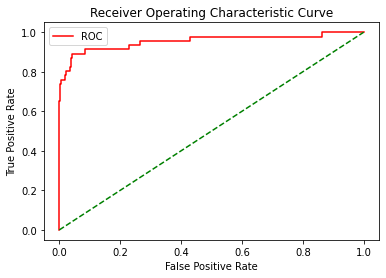

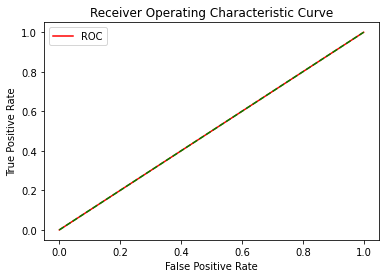

In [99]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
fper, tper, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:, 1])
plot_roc_curve(fper, tper)

# fper, tper, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
# plot_roc_curve(fper, tper)

fper, tper, thresholds = roc_curve(y_test, predict_constant)
plot_roc_curve(fper, tper)

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

accuracy бесполезна в задачах с неравными классами, и это легко показать на примере, потому что чисто сказав, что все оперцаии немошенические мы получим высокую accuracy. f1 score неплоха

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [100]:
log = LogisticRegression(solver="liblinear", l1_ratio=12).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)



In [101]:
print(f1_score(y_test, log.predict(X_test)))

0.5822784810126582


# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [102]:
# https://drive.google.com/file/d/1cdYal0wKUBTTRKjOkHkPnX_onSkAmDtU/view?usp=sharing
! gdown --id 1cdYal0wKUBTTRKjOkHkPnX_onSkAmDtU

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cdYal0wKUBTTRKjOkHkPnX_onSkAmDtU
To: /content/Bachelor_Degree_Majors.csv
100% 51.0k/51.0k [00:00<00:00, 54.8MB/s]


In [103]:
data = pd.read_csv('Bachelor_Degree_Majors.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   612 non-null    object
 1   Sex                                     612 non-null    object
 2   Age Group                               612 non-null    object
 3   Bachelor's Degree Holders               612 non-null    object
 4   Science and Engineering                 612 non-null    object
 5   Science and Engineering Related Fields  612 non-null    object
 6   Business                                612 non-null    object
 7   Education                               612 non-null    object
 8   Arts, Humanities and Others             612 non-null    object
dtypes: object(9)
memory usage: 43.2+ KB


In [104]:
data.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"


In [105]:
data.describe()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
count,612,612,612,612,612,612,612,612,612
unique,51,3,4,612,612,608,611,608,611
top,Alabama,Total,25 and older,"885,357","263,555","39,091","25,810","8,260","33,222"
freq,12,204,153,1,1,2,2,2,2


In [106]:
data = data[data["Sex"] != "Total"] # Нам интересно конкретный пол
data['Science and Engineering and Related Fields'] = data['Science and Engineering'] + data['Science and Engineering Related Fields']
for col in data.iloc[:,3:]:
  data[col] = data[col].apply(lambda x: int(x.replace(',', '')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
for col in data.iloc[:,3:]:
  data['state_mean_' + col] = data['State'].map(data.groupby('State')[col].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
data.head()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Science and Engineering and Related Fields,state_mean_Bachelor's Degree Holders,state_mean_Science and Engineering,state_mean_Science and Engineering Related Fields,state_mean_Business,state_mean_Education,"state_mean_Arts, Humanities and Others",state_mean_Science and Engineering and Related Fields
4,Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849,15936626004,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
5,Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678,501887712,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
6,Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269,6797712331,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
7,Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902,412015961,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
8,Alabama,Female,25 and older,479739,104189,72441,96238,111581,95290,10418972441,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09


In [109]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(data['State'])
data['State'] = le.transform(data['State'])
le.fit(data['Sex'])
data['Sex'] = le.transform(data['Sex'])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Science and Engineering and Related Fields,state_mean_Bachelor's Degree Holders,state_mean_Science and Engineering,state_mean_Science and Engineering Related Fields,state_mean_Business,state_mean_Education,"state_mean_Arts, Humanities and Others",state_mean_Science and Engineering and Related Fields
4,0,1,25 and older,405618,159366,26004,113909,29490,76849,15936626004,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
5,0,1,25 to 39,117794,50188,7712,29859,6357,23678,501887712,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
6,0,1,40 to 64,184328,67977,12331,54931,12820,36269,6797712331,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
7,0,1,65 and older,103496,41201,5961,29119,10313,16902,412015961,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09
8,0,0,25 and older,479739,104189,72441,96238,111581,95290,10418972441,221339.25,65888.75,24611.25,52536.75,35267.75,43034.75,5.560773e+09


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [110]:
X = data.iloc[:, data.columns != 'Age Group']
y = data['Age Group']

In [114]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.1, random_state = 42)
log = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
predict_constant = pd.Series([0]*len(y_test))
print("Accuracy score for logreg, knn, const")
print(accuracy_score(y_test, log.predict(X_test)))
#print(accuracy_score(y_test, knn.predict(X_test)))
print(accuracy_score(y_test, predict_constant))
print("Precision score for logreg, knn, const")


Accuracy score for logreg, knn, const
0.4634146341463415
0.0
Precision score for logreg, knn, const


ValueError: ignored

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?